# **Topic: Exploring Facial Recognition Through PCA and Recurrence Plot Analysis**



# **Objective**:  


# The objective of this code is to perform a facial recognition using machine learning techniques, specifically PCA for dimensionality reduction and SVM for classification. Additionally, the it aims to analyze the spatial patterns within the facial image dataset using Recurrence Plot Analysis. By extracting recurrence metrics such as Recurrence Rate, Determinism, Laminarity, Entropy, and Average Line Length, the code seeks to gain insights into the structural characteristics of the facial images that may influence recognition performance.

# **Import Libraries:**
# We start by importing necessary libraries. numpy for numerical computations, matplotlib for plotting, sklearn for machine learning tasks, seaborn for visualization enhancement, and scipy for scientific computing.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.stats import entropy

# Load Dataset:
# We load the facial image dataset (olivetti_faces.npy) and corresponding target labels (olivetti_faces_target.npy) using NumPy's load function.

In [ ]:
data = np.load("/content/olivetti_faces.npy")
target = np.load("/content/olivetti_faces_target.npy")

# **Visualize Data:**
# Defining two helper functions (show_40_distinct_people and show_10_faces_of_n_subject) to visualize a subset of the dataset.

In [ ]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [ ]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


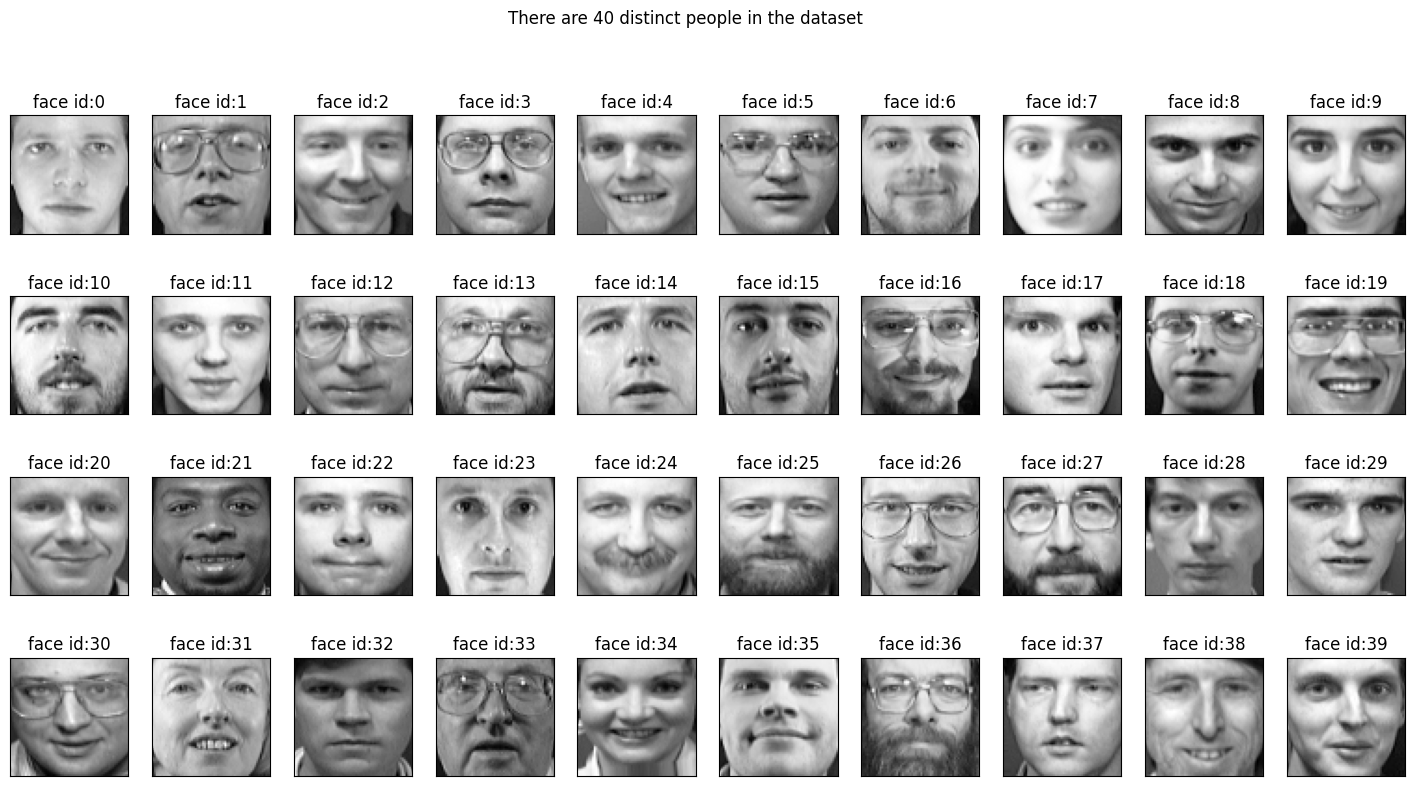

In [ ]:
def show_40_distinct_people(images, unique_ids):
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr=axarr.flatten()

    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

show_40_distinct_people(data, np.unique(target))

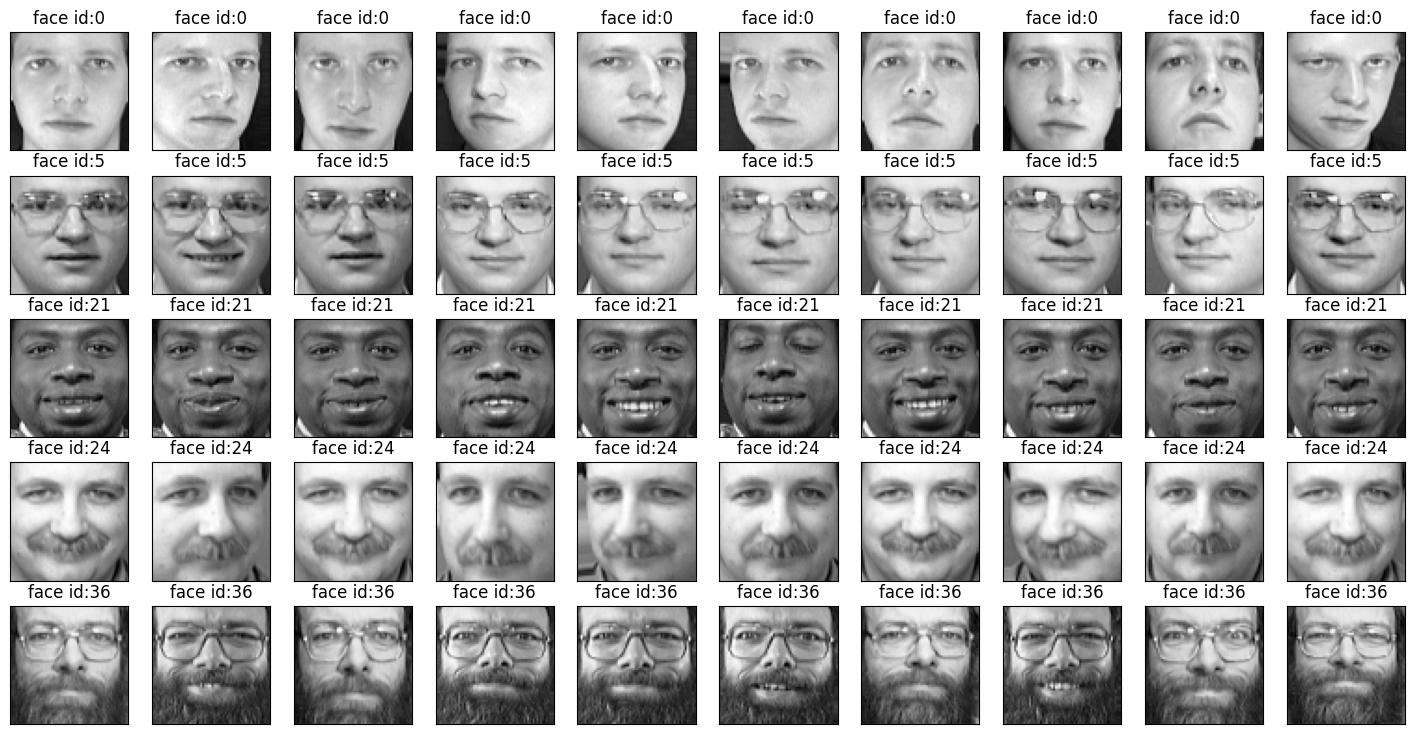

In [ ]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10
    rows=(len(subject_ids)*10)/cols
    rows=int(rows)

    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))

    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

# **Reshape Data:**
# Reshape the data array into a 2D array where each row represents a flattened image.

In [ ]:
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


# Split Data into Training and Testing Sets:

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


<Axes: title={'center': 'Number of Samples for Each Classes'}, xlabel='subject ids'>

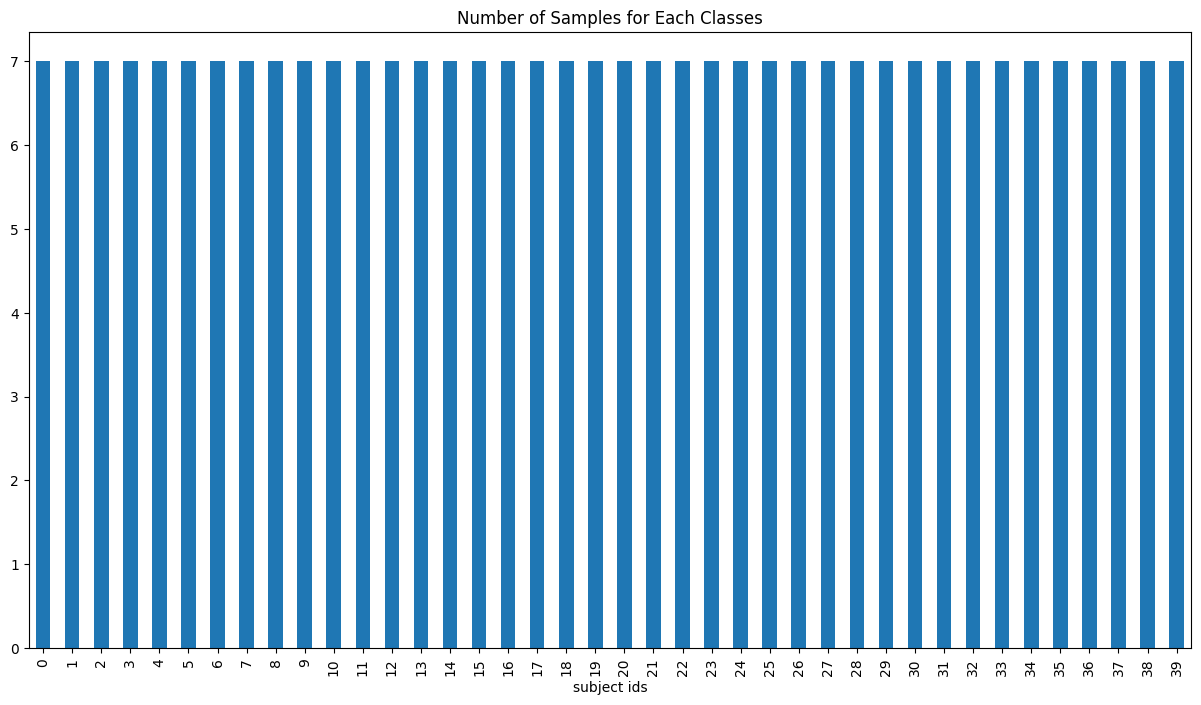

In [ ]:
import pandas as pd
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [ ]:
pip install mglearn

# **Principal Component Analysis (PCA):**
# Perform PCA on the dataset to reduce dimensionality.
# First, fit PCA with 2 components for visualization purposes.
# Then, fit PCA with 90 components for feature extraction.

In [ ]:
import mglearn

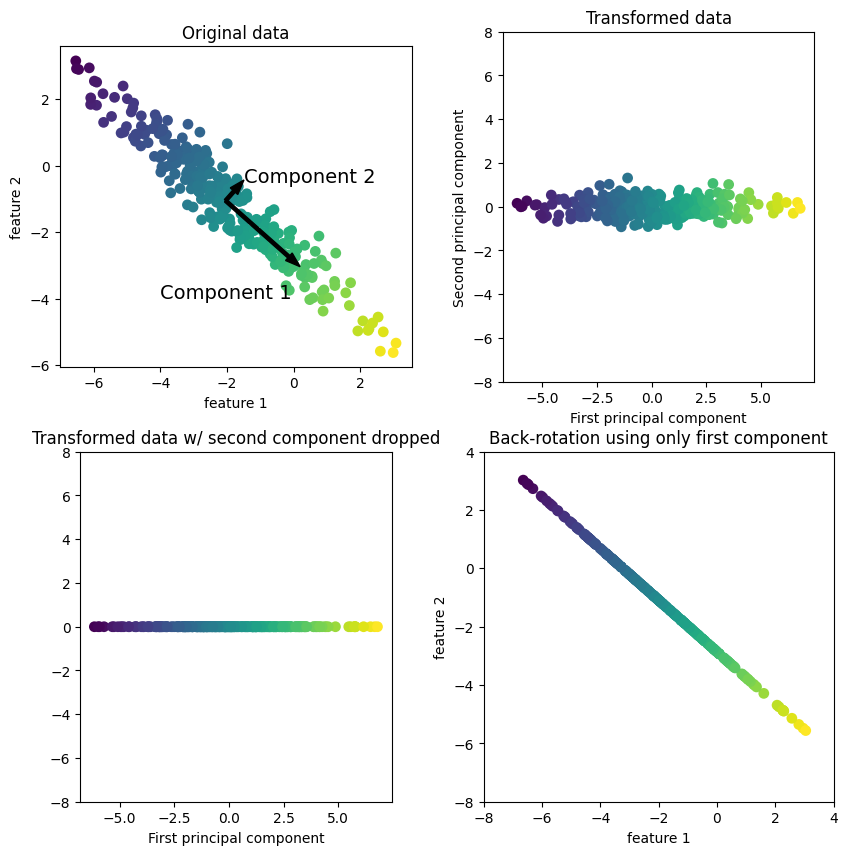

In [ ]:
mglearn.plots.plot_pca_illustration()

# PCA Projection of Defined Number of Target

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

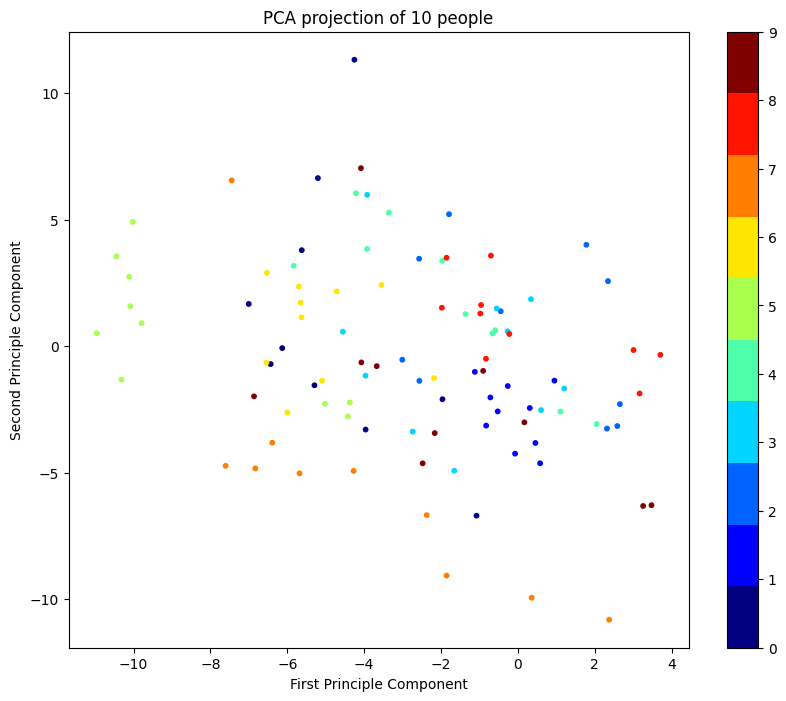

In [ ]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1],
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))
fig.colorbar(scatter)

# **Visualize PCA Components:**
# Visualize the principal components and eigenfaces.

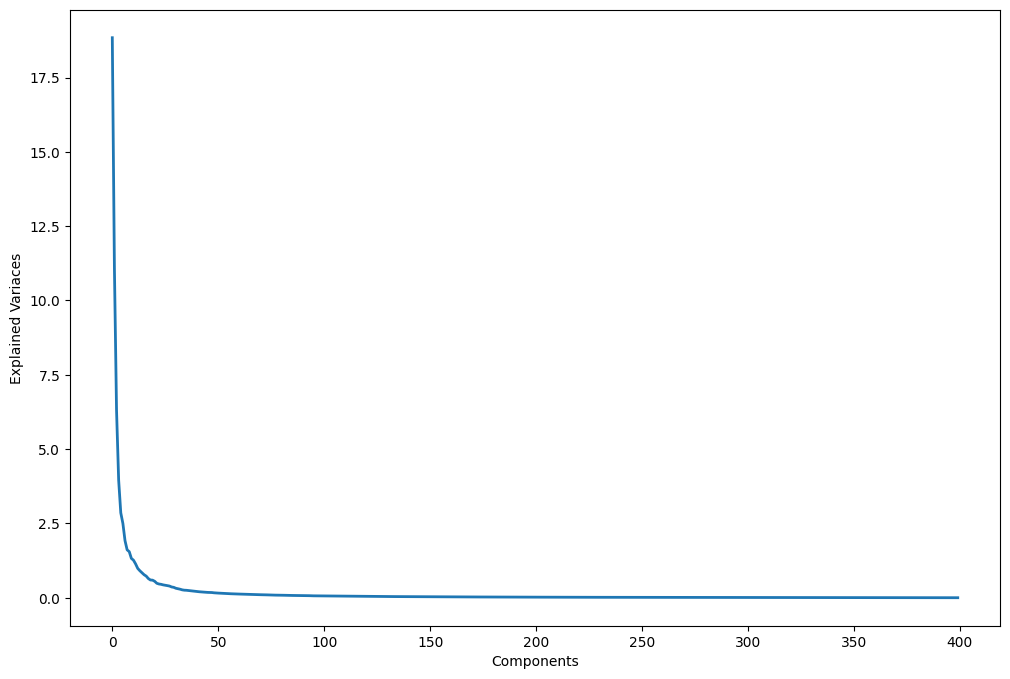

In [ ]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [ ]:
n_components=90
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

# Show Average Face

Text(0.5, 1.0, 'Average Face')

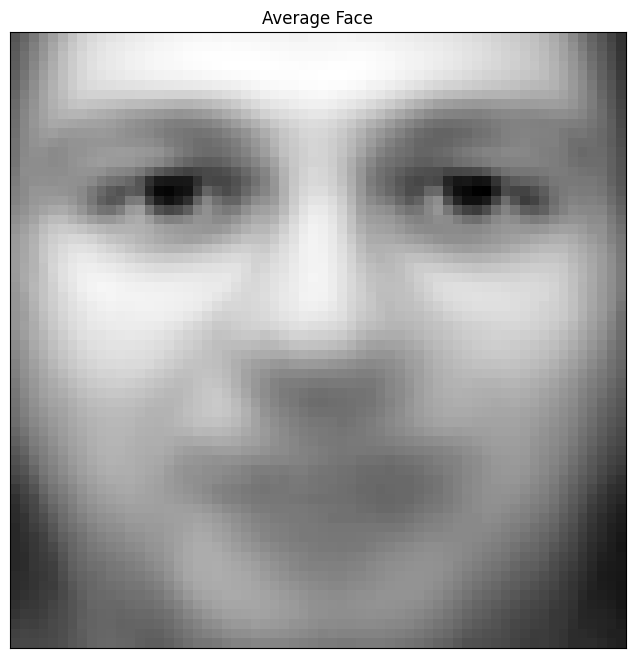

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

In [ ]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

# Show Eigen Faces

Text(0.5, 0.98, 'All Eigen Faces')

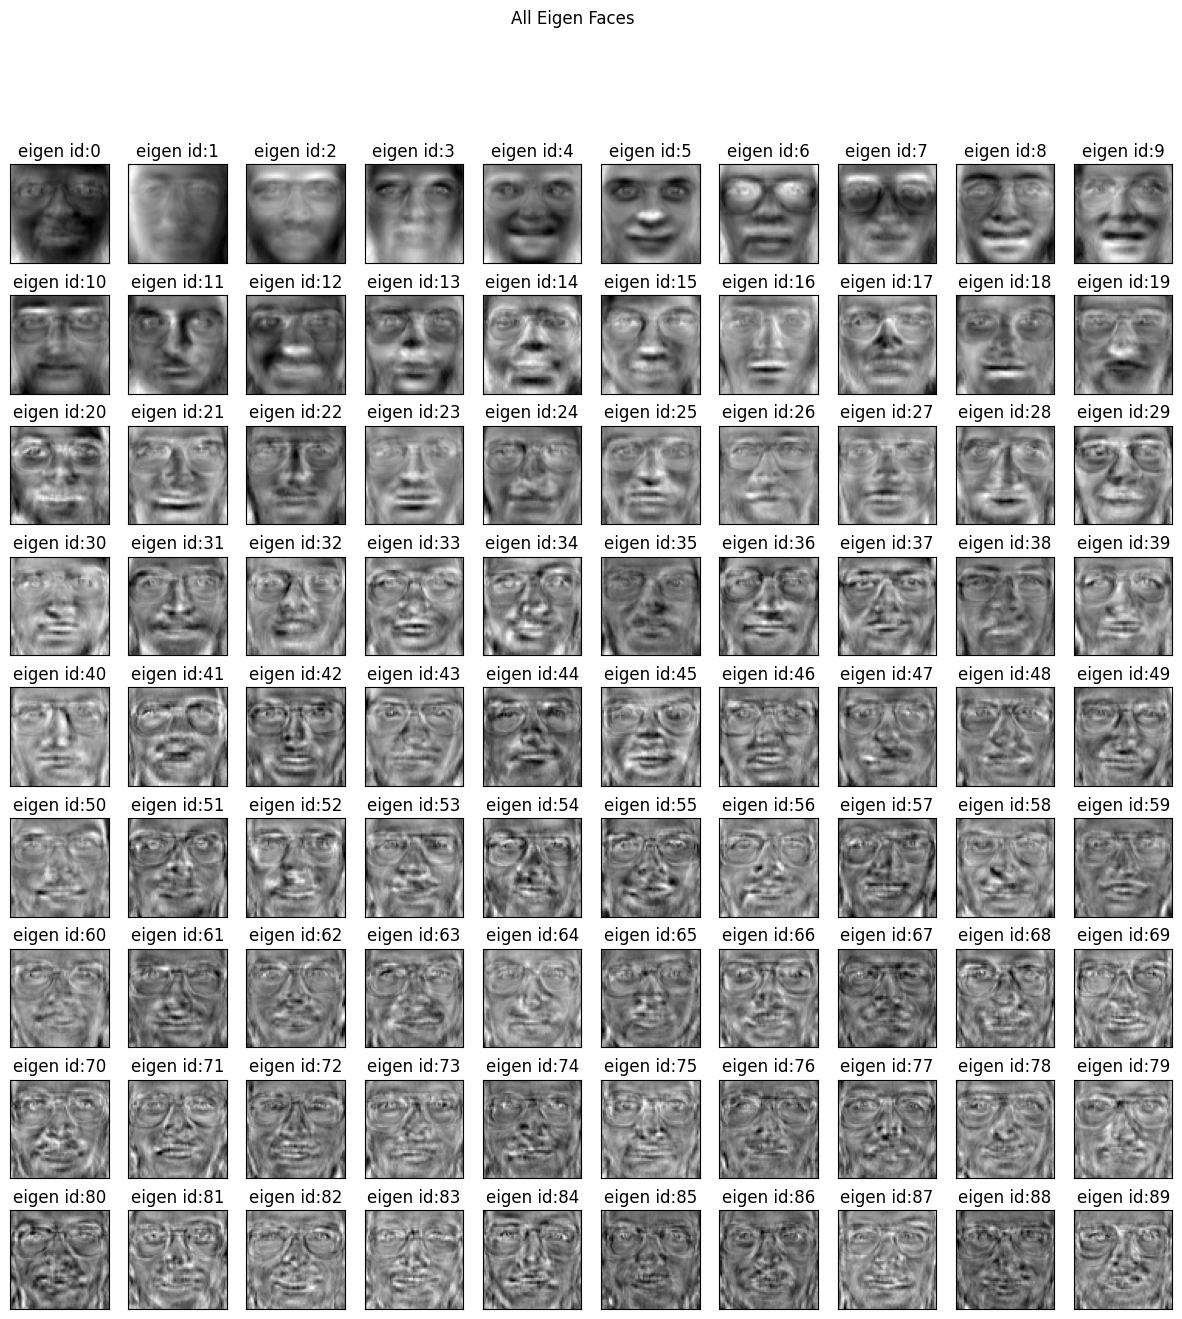

In [ ]:
cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces")

In [ ]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

# **Fit Support Vector Classifier (SVC):**
# Fit an SVC classifier on the training data transformed by PCA.

In [ ]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.92


# **Evaluate the Model:**
# Predict the labels for the test set and calculate the accuracy score.

In [ ]:
# Predict labels for test set
y_pred = clf.predict(X_test_pca)

# Evaluate the model
print("Accuracy score: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))


Accuracy score: 0.92


<Axes: >

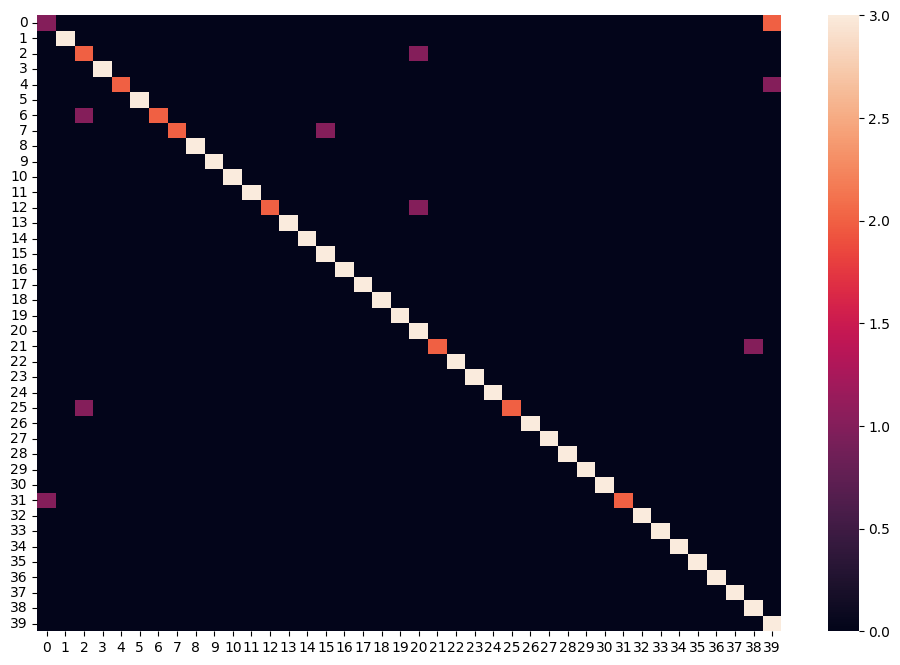

In [ ]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       1.00    

# **Recurrence Plot Analysis Function:**
# We define a function recurrence_plot to calculate the recurrence plot of a given dataset.

In [ ]:
# Recurrence Plot Analysis
combined_images_pca = pca.transform(X)

all_rp_matrix = np.zeros((len(combined_images_pca), len(combined_images_pca[0]), len(combined_images_pca[0])))
for k in range(len(combined_images_pca)):
    rp_matrix = recurrence_plot(combined_images_pca[k])
    all_rp_matrix[k] = rp_matrix

combined_rp_matrix = np.mean(all_rp_matrix, axis=0)

recurrence_rate, determinism, laminarity, entropy_value, avg_line_length = recurrence_metrics(combined_rp_matrix)



In [ ]:
# Recurrence Plot Analysis function
def recurrence_plot(data, eps=0.1):
    if data.ndim == 1:
        data = data.reshape(-1, 1)
    distances = pdist(data, 'euclidean')
    rp_matrix = squareform(distances < eps)
    return rp_matrix

def recurrence_metrics(rp_matrix):
    flat_rp = rp_matrix.flatten()

    # Recurrence Rate
    recurrence_rate = np.mean(flat_rp)

    # Determinism
    determinism = np.sum(np.diag(rp_matrix)) / np.sum(rp_matrix)

    # Laminarity
    laminarity = np.sum(np.sum(np.triu(rp_matrix))) / np.sum(rp_matrix)

    # Entropy
    line_lengths = np.sum(rp_matrix, axis=1)
    entropy_value = entropy(line_lengths)

    # Average Diagonal Line Length
    avg_line_length = np.mean(line_lengths[line_lengths > 0])

    return recurrence_rate, determinism, laminarity, entropy_value, avg_line_length


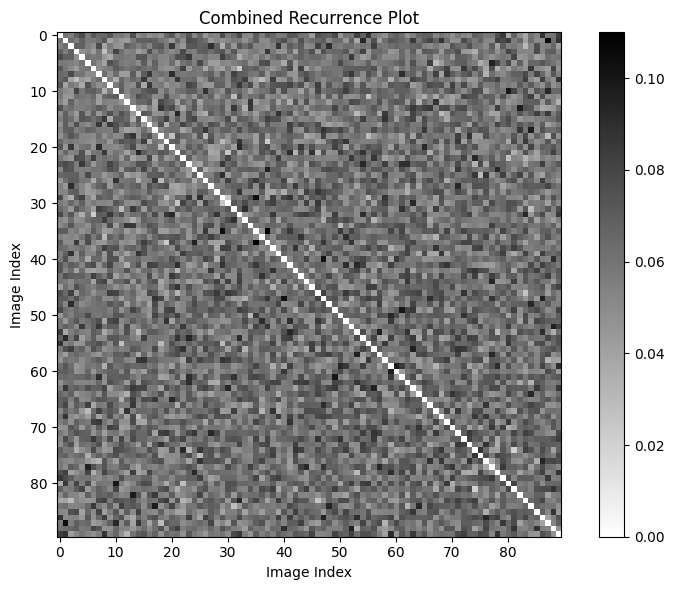

In [ ]:
# Plotting recurrence plot
plt.figure(figsize=(8, 6))
plt.imshow(combined_rp_matrix, cmap='binary', interpolation='none')
plt.title('Combined Recurrence Plot')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.colorbar()
plt.tight_layout()
plt.show()




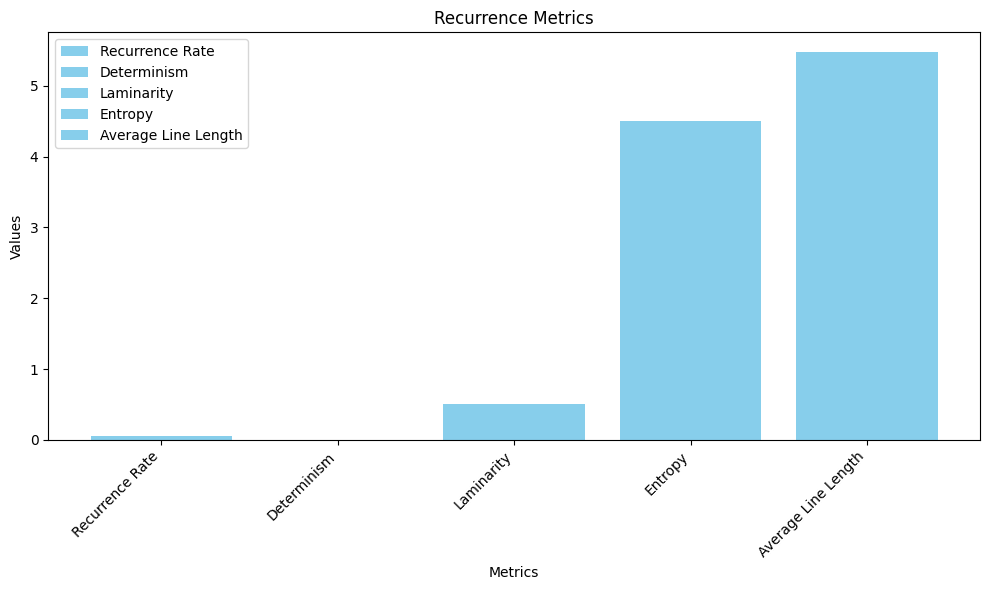

In [ ]:
# Plotting recurrence metrics as separate bars
metrics_names = ['Recurrence Rate', 'Determinism', 'Laminarity', 'Entropy', 'Average Line Length']
metrics_values = [recurrence_rate, determinism, laminarity, entropy_value, avg_line_length]

plt.figure(figsize=(10, 6))
for i, (name, value) in enumerate(zip(metrics_names, metrics_values)):
    plt.bar(i, value, color='skyblue', label=name)

plt.title('Recurrence Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(range(len(metrics_names)), metrics_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Entropy around 4.5 suggests moderate complexity or randomness in the dynamics.
Average Line Length around 5.5 indicates that, on average, the recurrent states persist for a moderate duration.
Laminarit around 0.4 implies that around 40% of the recurrent states form vertical lines, indicating some degree of predictability in the system's behavior within these laminar regions.
Determinism around 0 indicates purely stochastic dynamics, meaning the system lacks deterministic structure.
Recurrence Rate around 0.1 implies a relatively low density of recurrent states in the phase space.
These metrics collectively provide insights into the underlying structure, predictability, and complexity of the dynamics represented by the recurrence plot.